# Quantum Computing – Week 4: Multi-Qubit Systems
This notebook explores **tensor products, multi-qubit gates, and measurement** using Qiskit.

## 1. Building Multi-Qubit States
We begin with a simple 2-qubit system. In Qiskit, when you create a `QuantumCircuit(2)`, both qubits start in the state $|0\rangle$. The combined state is $|00\rangle$. This corresponds to the tensor product $|0\rangle \otimes |0\rangle$. 

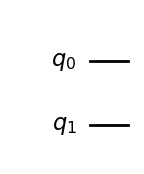

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.draw('mpl')

## 2. Superposition and Tensor Product
Apply a Hadamard gate to the first qubit. This puts it in the superposition $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$. The joint state is:

$$|+0\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle)$$

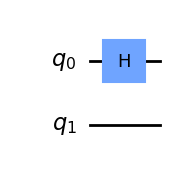

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw('mpl')

## 3. Controlled Operations (CNOT)
Now, apply a CNOT gate with the first qubit as control and the second as target. This produces the **Bell state**:

$$|\Phi^+\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

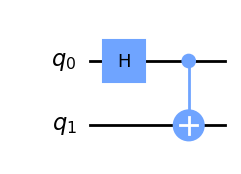

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')

## 4. Measurement in Multi-Qubit Systems
Measure both qubits. The outcomes should be `00` and `11` with equal probability (about 50% each).

{'00': 542, '11': 482}


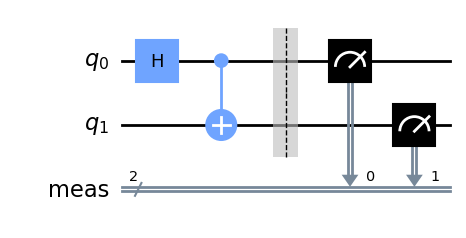

In [5]:
from qiskit import Aer, execute

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

sim = Aer.get_backend('aer_simulator')
result = execute(qc, backend=sim, shots=1024).result()
counts = result.get_counts()
print(counts)
qc.draw('mpl')

## 5. Other Multi-Qubit Gates
We can also explore other important multi-qubit gates like Toffoli, SWAP, and CZ.

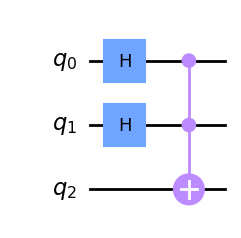

In [6]:
# Toffoli Gate (CCX)
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.ccx(0, 1, 2)
qc.draw('mpl')

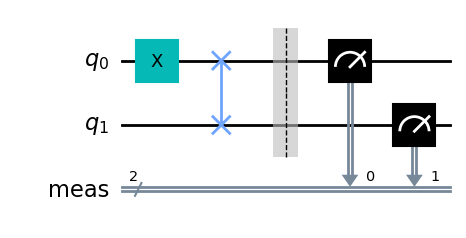

In [7]:
# SWAP Gate
qc = QuantumCircuit(2)
qc.x(0)  # set qubit 0 to |1>
qc.swap(0, 1)
qc.measure_all()
qc.draw('mpl')

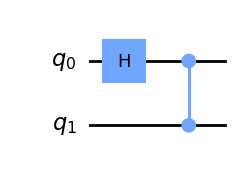

In [8]:
# Controlled-Z Gate (CZ)
qc = QuantumCircuit(2)
qc.h(0)
qc.cz(0, 1)
qc.draw('mpl')

## 6. Visualization Tools
Qiskit provides visualization methods to understand the statevector or measurement outcomes.

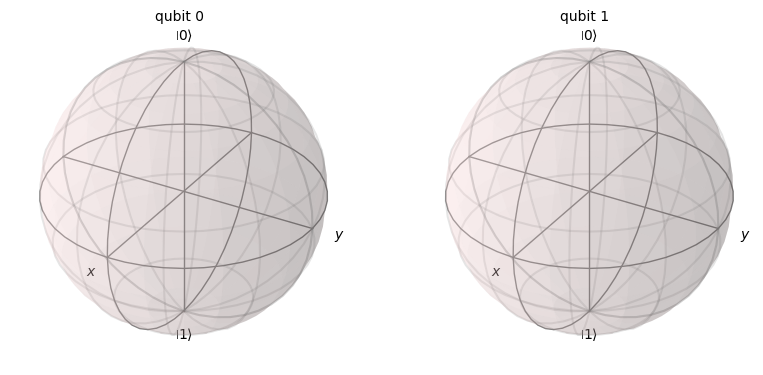

In [9]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

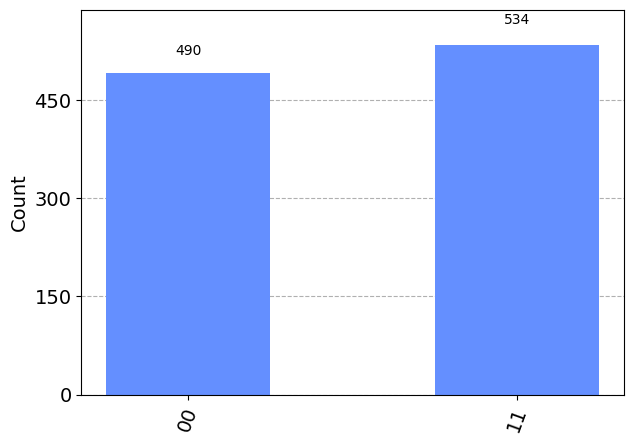

In [10]:
# Plot histogram of Bell state measurement results
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

result = execute(qc, backend=sim, shots=1024).result()
plot_histogram(result.get_counts())

## 7. Exercises for Students
1. Apply an X gate to the second qubit of the Bell state. What state do you get?
2. Construct the state $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$ using Qiskit.
3. Try applying a SWAP gate on $|01\rangle$. Verify the result matches $|10\rangle$.
4. Use `plot_bloch_multivector` to visualize the superposition state $|+\rangle\otimes|+\rangle$.